In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy
import glob
import pylab as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
from skimage import io, color
from numpy import save

In [0]:
# //This code snippet will first make a directory to save the corresponding ".npz" of each image.Hence here it will
# //create 3 folder under the MergedDataset Folder.Then in the corresponding folder it will sequentially save the
# //feature matrix for each image.

import cv2
from google.colab.patches import cv2_imshow
import numpy
import glob
import pylab as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
from skimage import io, color
from numpy import save

folders = glob.glob('/content/drive/My Drive/new_dataset/train/*')
imagesall = []
for folder in folders:
  p = folder + '_npy'
  os.mkdir(p) //Create the corresponding folder
  imagesall = glob.glob(folder + '/*')
  for k in range(len(imagesall)):
    //do some preprocessing on the image 
    image = cv2.imread(imagesall[k])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = np.float32(image)
    image /= 255
    //Calculate the feature matrix using the wavelet transform 
    coeffs2 = pywt.dwt2(image, 'haar')
    coeffs2 = np.array(coeffs2)
    //Save the feature matrix in the form of".npy" file
    np.save(os.path.join(p , str(k)+ '_jpg') ,coeffs2)

SyntaxError: ignored

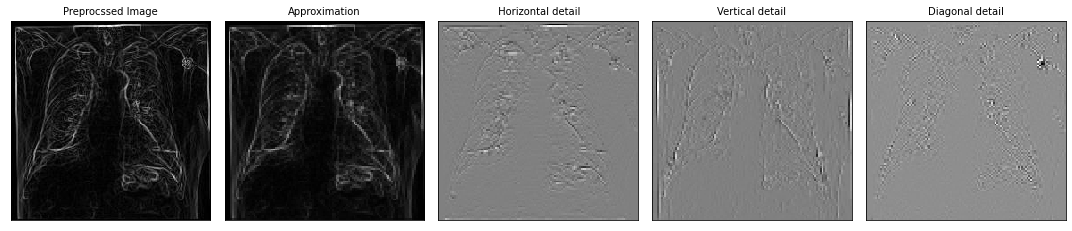

In [20]:
# //Here is the following code snippet to visualize the wavelet transform of a specific sample image.
# //We have here implemented wavelet transform utilizing "Haar" method generally used For x-ray images.

import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
# //Reading the image And doing some preprocessing

image1 = cv2.imread('/content/drive/My Drive/final_dataset/CovidPreprocessedImage/covid_11')
image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#image = cv2.resize(image, (224, 224))
image = np.float32(image)
image /= 255
# Wavelet transform of image, and plot approximation and details
titles = ['Preprocssed Image','Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs2

# print ('Approximation detail is:'+ str(LL))
# print ('Horizontal detail :'+ str(LH))
# print('Vertical Detail:' + str(HL))
# print ('Diagonal Detail:' + str(HH))

# //Visulizing the extracted features along diggerent dimensions/directions

fig = plt.figure(figsize=(15, 10))
for i, a in enumerate([image1,LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.savefig(os.path.join('/content/drive/My Drive/(Prasun)AllCodes&Results/2ndROC', 'Before&AfterWavelet5.png'))
fig.tight_layout()
plt.show()